In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches
import scipy.spatial as spatial
from random import randint

In [13]:
# Load the prepared data set
X = np.load('DBSCAN_example.npy')
X = X.reshape(2,30)

search_tree = spatial.cKDTree(np.c_[X[0,:], X[1,:]])

In [14]:
# Map from numpy to pandas
df = pd.DataFrame().from_dict({'id': np.full(len(X[0, :]), np.nan), 'x': X[0, :], 'y': X[1, :], 'color': np.zeros(len(X[0, :]))})

<AxesSubplot:xlabel='x', ylabel='y'>

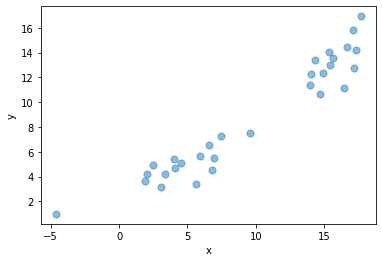

In [15]:
df.plot.scatter(x='x', y='y', s=50, alpha=0.5)

# DBSCAN
Density-Based Spatial Clustering of Applications with Noise (DBSCAN) has 2 core parameters which have to be assigned before we can start: 
1. $\epsilon$
2. ```min_pts```

Here $\epsilon$ represents the radius of a circle around a particular point within the dataset and ```min_pts``` denotes a threshold used in the clustering process to distinguish between a cluster, a border, and a noise point.

In [16]:
def get_points_within_circle(df, idx, eps, search_tree=search_tree):
    pts = search_tree.query_ball_point([df.x[idx],df.y[idx]], eps)
    #pts.remove(idx)
    return pts

In [22]:
def draw_iteration(df, idx, eps=2, **kwargs):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(df.x, df.y, s=50, alpha=0.5)
    ax.scatter(df.x[idx], df.y[idx], marker='h', label='current point')
    
    circle = plt.Circle((df.x[idx], df.y[idx]), eps, alpha=0.3, edgecolor='k')
    ax.add_patch(circle)
    
    if 'circle_points' in kwargs:
        ax.scatter(df.x[kwargs['circle_points']], df.y[kwargs['circle_points']], color='b', s=50)
    
    # Draw core points
    if 'core' in kwargs:
        ax.plot(df.x[kwargs['core']], df.y[kwargs['core']], marker='o', linestyle='None')
        
    # Draw noise points
    if 'noise' in kwargs:
        ax.plot(df.x[kwargs['noise']], df.y[kwargs['noise']], linestyle = 'None', marker='x', color='r', markersize=10)
    
    # Draw border points  
    if 'border' in kwargs:
        ax.scatter(df.x[kwargs['border']], df.y[kwargs['border']], color='g', s=50)
        
   
    fig.gca().set_aspect('equal', adjustable='box')

In [18]:
def get_point_type(df, point_types, idx, circle_points, min_pts):
    
    if len(circle_points)-1 == 0:  # We have to subtract one, since our centroid is also included in circle_points
        point_types['noise'].append(idx)
        print(point_types['noise'])
        
    else: 
        n_pts = len(circle_points) -1
                
        if n_pts >= min_pts:
            point_types['core'].extend(circle_points)
            
        elif (n_pts < min_pts) and (n_pts != 0):
            point_types['border'].append(idx)
            
    return point_types, df

In [19]:
def update_class(df, circle_points, key='id'):
    
    if any(df[key][circle_points] > 0):
        df[key][circle_points] = df[key][circle_points].max()

    else:
        df['id'][circle_points] = np.random.randint(1, 20)

    return df

[1]


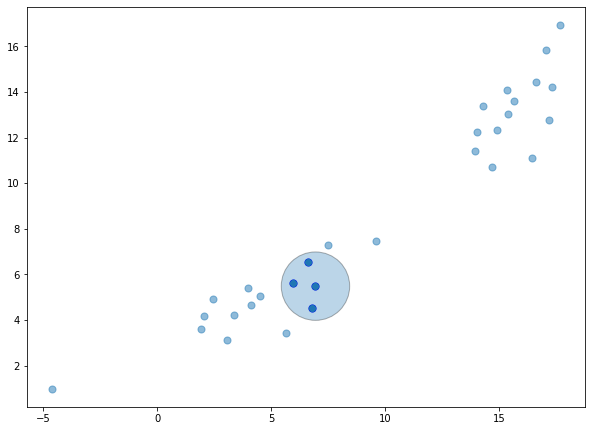

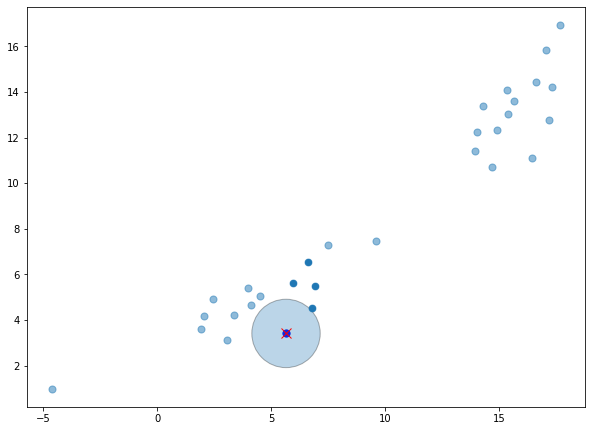

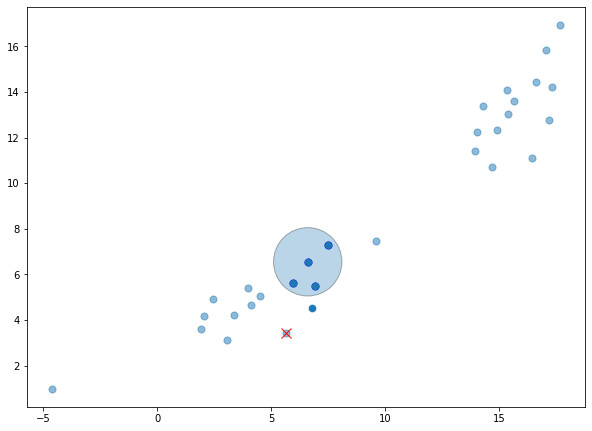

In [21]:
eps = 1.5
min_pts = 3
point_types = {'core': [], 
              'border': [],
              'noise': []}

for idx, _ in enumerate(df.x):
    circle_points = get_points_within_circle(df, idx, eps, search_tree)
    
    point_types, df = get_point_type(df, point_types, idx, circle_points, min_pts)
    
    df = update_class(df, circle_points) 
    draw_iteration(df, idx, eps,
                   circle_points=circle_points, 
                   core=point_types['core'], 
                   noise=point_types['noise'],
                   border=point_types['border'])
    
    
    if idx == 2: 
        break